**Kelompok 3**

Anggota Kelompok:
1. Dani Harmade
2. Affif Fathin

Kasus: Saham META

In [398]:
import yfinance as yf
import pandas as pd

# Tentukan kode saham untuk DBS Group Holdings Ltd
kode_saham = "META"

# Tentukan rentang waktu
start_date = "2019-01-01"
end_date = "2025-05-18"

# Ambil data menggunakan yfinance
df = yf.download(kode_saham, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,META,META,META,META,META
Date,,,,,
2019-01-02,135.043533,136.864951,127.956937,128.384928,28146200
2019-01-03,131.122040,136.526561,130.504938,134.058199,22717900
2019-01-04,137.302902,137.352671,133.122607,133.381382,29002100
2019-01-07,137.402420,138.218566,135.272459,136.914713,20089300
2019-01-08,141.861389,142.468528,138.885410,139.233774,26263800


In [399]:
# Import data
import pandas as pd

df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df = df.reset_index()
df.head()

,Date,Close,High,Low,Open,Volume
0,2019-01-02,135.043533,136.864951,127.956937,128.384928,28146200
1,2019-01-03,131.122040,136.526561,130.504938,134.058199,22717900
2,2019-01-04,137.302902,137.352671,133.122607,133.381382,29002100
3,2019-01-07,137.402420,138.218566,135.272459,136.914713,20089300
4,2019-01-08,141.861389,142.468528,138.885410,139.233774,26263800


In [400]:
# Mengambil kolom Date dan Close
data = df[['Date', 'Close']]
data.tail()

,Date,Close
1598,2025-05-12,639.429993
1599,2025-05-13,656.030029
1600,2025-05-14,659.359985
1601,2025-05-15,643.880005
1602,2025-05-16,640.340027


In [401]:
# data = data[data['Date'] >= '2020-01-01'].reset_index(drop=True)
# data.head()

In [402]:
# Melihat informasi pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1603 non-null   datetime64[ns]
 1   Close   1603 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.2 KB


In [403]:
# Melihat data yang kosong
data.isna().sum()

,0
Date,0
Close,0


In [404]:
# Melihat deskripsi data
data.describe()

,Date,Close
count,1603,1603.000000
mean,2022-03-08 13:17:42.258265856,299.738358
min,2019-01-02 00:00:00,88.492935
25%,2020-08-04 12:00:00,188.128342
50%,2022-03-08 00:00:00,265.837097
75%,2023-10-10 12:00:00,348.811050
max,2025-05-16 00:00:00,736.015198
std,NaN,143.187295


In [405]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense, Input
from keras.layers import GRU

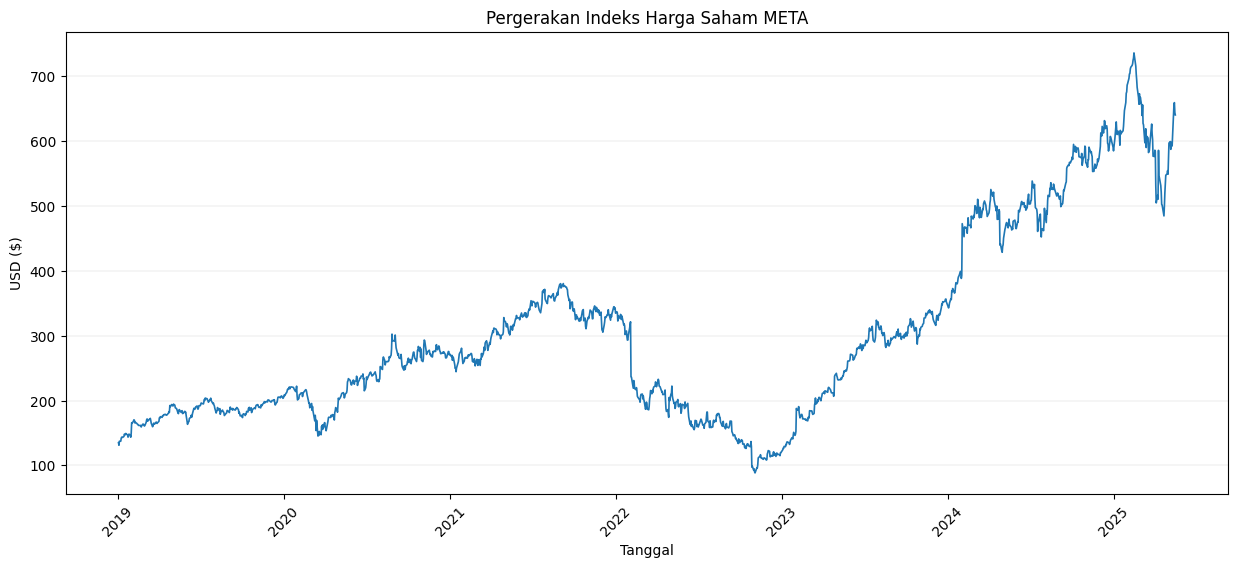

In [406]:
# Visualisasi data
import matplotlib.pyplot as plt
plt.style.use('default')

plt.figure(figsize=(15,6))
plt.title('Pergerakan Indeks Harga Saham META')
plt.plot(data['Date'], data['Close'], linewidth=1.2)
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.xticks(rotation=45)
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [407]:
# Melakukan normalisasi data
sc = MinMaxScaler(feature_range=(0, 1))
data_sc = sc.fit_transform(data[['Close']].values)
data_sc

array([[0.07189034],
       [0.06583419],
       [0.0753796 ],
       ...,
       [0.88161764],
       [0.85771116],
       [0.8522442 ]])

In [408]:
# norm = pd.DataFrame(data_sc)
# norm.head()

In [409]:
# norm.to_excel('Hasil_Normalisasi.xlsx')

In [410]:
# Pembagian data (80% training, 10% testing, 10% validasi)
train_len = int(len(data_sc) * 0.8)
test_len = int(len(data_sc) * 0.10)
val_len = len(data_sc) - train_len - test_len

In [411]:
# Menampilkan jumlah data
print(f'Jumlah data keseluruhan: {len(data_sc)}')
print(f'Jumlah data training: {train_len}')
print(f'Jumlah data validasi: {val_len}')
print(f'Jumlah data testing:{test_len}')

Jumlah data keseluruhan: 1603
Jumlah data training: 1282
Jumlah data validasi: 161
Jumlah data testing:160


In [412]:
# Membuat Windowing pada data Training
train_data = data_sc[0:train_len  , : ]
x_train=[]
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i,0])
    y_train.append(train_data[i,0])

In [413]:
# Mengubah tipe data list menjadi NumPy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [414]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [415]:
# Membuat Windowing pada data Validation
val_data = data_sc[train_len - 30:(train_len + val_len) , : ]
x_val = []
y_val = []
for i in range(30,len(val_data)):
    x_val.append(val_data[i-30:i,0])
    y_val.append(val_data[i,0])

In [416]:
# Mengubah tipe data list menjadi NumPy array
x_val, y_val = np.array(x_val), np.array(y_val)

In [417]:
# Ubah bentuk data menjadi bentuk yang diterima oleh LSTM
x_val = np.reshape(x_val, (x_val.shape[0],x_val.shape[1],1))

# BI-GRU

In [418]:
# Membangun model Bi-GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dropout, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_bigru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    Bidirectional(GRU(100, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(GRU(100, return_sequences=False)),
    Dropout(0.2),
    Dense(1)
])

In [419]:
# Path GRU model checkpoint
checkpoint_path_bigru = 'model_checkpoints/weights_bigru_model.weights.h5'
checkpoint_bigru = ModelCheckpoint(
    filepath=checkpoint_path_bigru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [420]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [421]:
# Compile model Bi-GRU (pastikan variabel `op` terdefinisi, atau ganti langsung dengan 'adam')
model_bigru.compile(optimizer='adam', loss='mean_squared_error')

In [422]:
# Training model Bi-GRU
history_bigru = model_bigru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_bigru, early_stopping]
)

Epoch 1/100
155/157 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0054
Epoch 1: val_loss improved from inf to 0.00313, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0053 - val_loss: 0.0031
Epoch 2/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.1010e-04
Epoch 2: val_loss improved from 0.00313 to 0.00052, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 5.0934e-04 - val_loss: 5.1713e-04
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3329e-04
Epoch 3: val_loss improved from 0.00052 to 0.00040, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 4.3314e-04 - val_loss: 4.0228e-04
Epoch 4/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3.9625e-04
Epoch 4: val_loss improved from 0.00040 to 0.00033, saving model to model_checkpoints/weights_bigru_model.weights.h5
157/

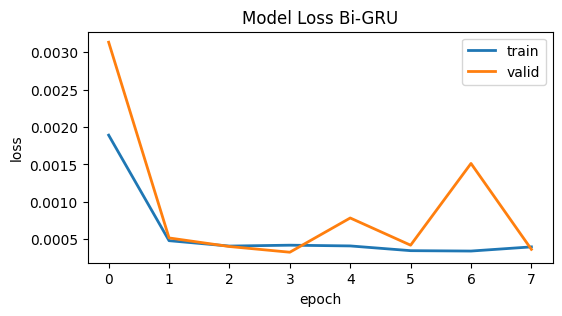

In [423]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_bigru.history['loss'], linewidth=2)
plt.plot(history_bigru.history['val_loss'], linewidth=2)
plt.title('Model Loss Bi-GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [424]:
# Membuat Windowing pada data testing
test_data = data_sc[(-test_len - 30): , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  data[['Close']].iloc[-test_len : , : ].values
for i in range(30,len(test_data)):
    x_test.append(test_data[i-30:i,0])

In [425]:
# Mengubah tipe data list menjadi NumPy array
x_test = np.array(x_test)

In [426]:
# Ubah bentuk data menjadi bentuk yang diterima oleh BI-GRU
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [427]:
# Load bobot model GRU terbaik
model_bigru.load_weights("/content/model_checkpoints/weights_bigru_model.weights.h5")

In [428]:
# Melakukan prediksi
y_pred_bigru = model_bigru.predict(x_test)
y_pred_bigru = np.ceil(sc.inverse_transform(y_pred_bigru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [429]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Evaluasi Bi-GRU
mse_bigru = round(mean_squared_error(y_test, y_pred_bigru), 2)
rmse_bigru = round(np.sqrt(np.mean(y_test - y_pred_bigru)**2), 2)
mae_bigru = round(mean_absolute_error(y_test, y_pred_bigru), 2)
mape_bigru = round(mean_absolute_percentage_error(y_test, y_pred_bigru)*100, 2)

print("\n📊 Evaluasi Bi-GRU Model:")
print(f'MSE  : {mse_bigru}')
print(f'RMSE : {rmse_bigru}')
print(f'MAE  : {mae_bigru}')
print(f'MAPE : {mape_bigru} %')


📊 Evaluasi Bi-GRU Model:
MSE  : 299.06
RMSE : 2.13
MAE  : 12.8
MAPE : 2.16 %


In [430]:
# dataframe hasil prediksi BI-GRU
data_pred_bigru = data[-test_len:].copy()
data_pred_bigru['Prediction_BIGRU'] = y_pred_bigru

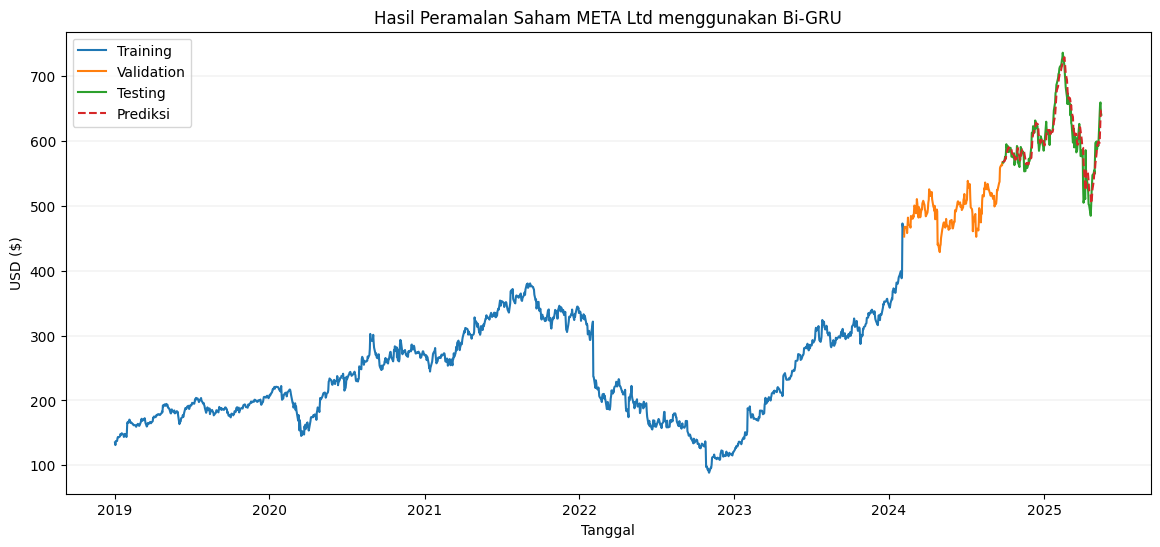

In [431]:
# Visualisasi Hasil Prediksi BI-GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham META Ltd menggunakan Bi-GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Close'], label='Testing')
plt.plot(data_pred_bigru['Date'], data_pred_bigru['Prediction_BIGRU'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [432]:
# Ambil 30 hari terakhir sebagai input awal
last_30_bigru = data_sc[-30:]
input_pred_bigru = last_30_bigru.reshape(1, 30, 1)

future_preds_bigru = []

for _ in range(30):
    next_pred_bigru = model_bigru.predict(input_pred_bigru, verbose=0)[0][0]
    future_preds_bigru.append(next_pred_bigru)

    # Perbarui jendela input
    next_input_bigru = np.append(input_pred_bigru[0, 1:, 0], next_pred_bigru)
    input_pred_bigru = next_input_bigru.reshape(1, 30, 1)

In [433]:
# Invers transformasi skala
future_preds_inv_bigru = sc.inverse_transform(np.array(future_preds_bigru).reshape(-1, 1))
future_preds_inv_bigru = np.ceil(future_preds_inv_bigru)

In [434]:
# Buat tanggal prediksi (hanya hari kerja)
from datetime import timedelta

last_date_bigru = pd.to_datetime(data['Date'].iloc[-1])
future_dates_bigru = []
curr_date_bigru = last_date_bigru + timedelta(days=1)

while len(future_dates_bigru) < 30:
    if curr_date_bigru.weekday() < 5:  # Hanya hari kerja
        future_dates_bigru.append(curr_date_bigru)
    curr_date_bigru += timedelta(days=1)

In [435]:
# Buat DataFrame hasil prediksi BI-GRU
pred_30_bigru_df = pd.DataFrame({
    'Date': future_dates_bigru,
    'Prediction_BIGRU': future_preds_inv_bigru.flatten()
})

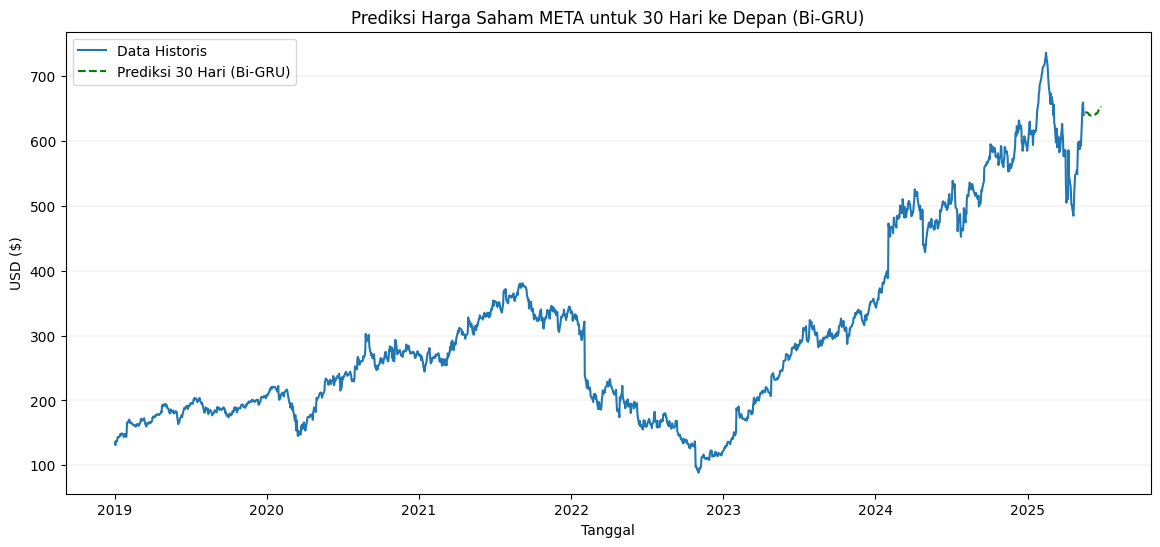

In [436]:
# Visualisasi hasil prediksi 30 hari ke depan dengan Bi-GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham META untuk 30 Hari ke Depan (Bi-GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_bigru_df['Date'], pred_30_bigru_df['Prediction_BIGRU'], label='Prediksi 30 Hari (Bi-GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# GRU

In [437]:
model_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

In [438]:
# Path GRU model checkpoint
checkpoint_path_gru = 'model_checkpoints/weights_gru_model.weights.h5'
checkpoint_gru = ModelCheckpoint(
    filepath=checkpoint_path_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [439]:
# Early Stopping
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [440]:
# Compile model GRU
model_gru.compile(optimizer='adam', loss='mean_squared_error')

In [441]:
# Training model GRU
history_gru = model_gru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_gru, early_stopping]
)

Epoch 1/100
150/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059
Epoch 1: val_loss improved from inf to 0.00085, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0057 - val_loss: 8.5357e-04
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.4177e-04
Epoch 2: val_loss improved from 0.00085 to 0.00046, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.4141e-04 - val_loss: 4.5910e-04
Epoch 3/100
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5204e-04
Epoch 3: val_loss did not improve from 0.00046
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.5306e-04 - val_loss: 8.2230e-04
Epoch 4/100
151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0354e-04
Epoch 4: val_loss improved from 0.00046 to 0.00035, saving model to model_checkpoints/weights_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.0074e-04 - val_loss: 3.5455e-04

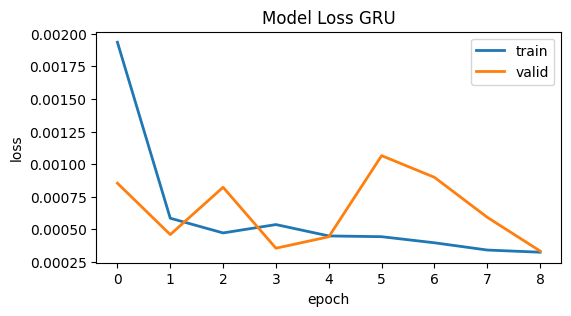

In [442]:
# Menampilkan plot nilai loss
plt.figure(figsize=(6,3))
plt.plot(history_gru.history['loss'], linewidth=2)
plt.plot(history_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [443]:
# Load bobot model GRU terbaik
model_gru.load_weights("/content/model_checkpoints/weights_gru_model.weights.h5")

In [444]:
# Melakukan prediksi
y_pred_gru = model_gru.predict(x_test)
y_pred_gru = np.ceil(sc.inverse_transform(y_pred_gru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


In [445]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Evaluasi GRU
mse_gru = round(mean_squared_error(y_test, y_pred_gru), 2)
rmse_gru = round(np.sqrt(np.mean(y_test - y_pred_gru)**2), 2)
mae_gru = round(mean_absolute_error(y_test, y_pred_gru), 2)
mape_gru = round(mean_absolute_percentage_error(y_test, y_pred_gru)*100, 2)

print("\n📊 Evaluasi GRU Model:")
print(f'MSE  : {mse_gru}')
print(f'RMSE : {rmse_gru}')
print(f'MAE  : {mae_gru}')
print(f'MAPE : {mape_gru} %')


📊 Evaluasi GRU Model:
MSE  : 251.34
RMSE : 2.51
MAE  : 11.76
MAPE : 1.97 %


In [446]:
# dataframe hasil prediksi GRU
data_pred_gru = data[-test_len:].copy()
data_pred_gru['Prediction_GRU'] = y_pred_gru

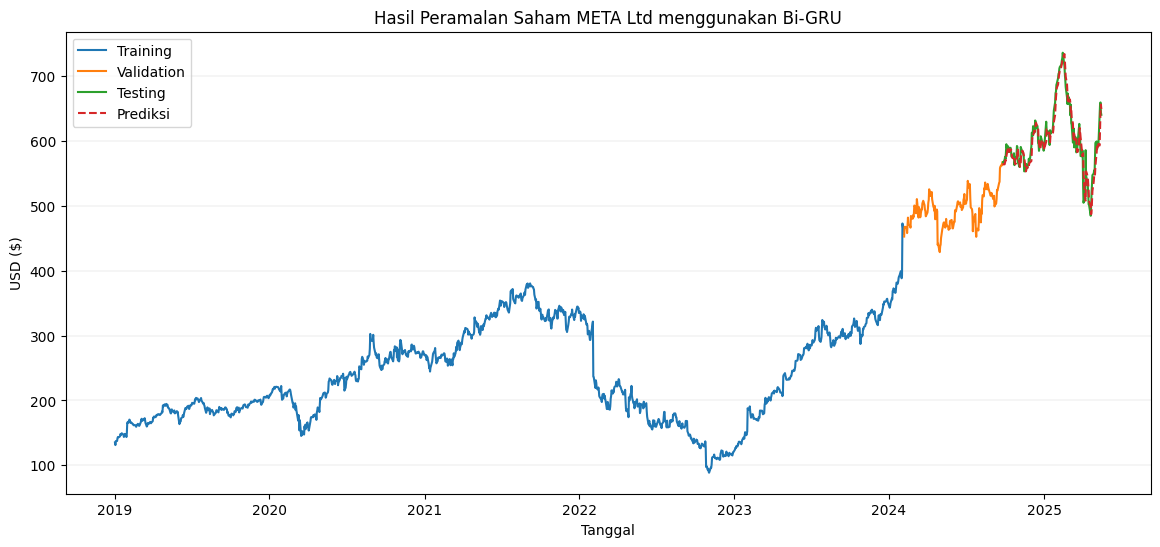

In [447]:
# Visualisasi Hasil Prediksi GRU
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham META Ltd menggunakan Bi-GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_gru['Date'], data_pred_gru['Close'], label='Testing')
plt.plot(data_pred_gru['Date'], data_pred_gru['Prediction_GRU'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [448]:
# Ambil 30 hari terakhir sebagai input awal
last_30_gru = data_sc[-30:]
input_pred_gru = last_30_gru.reshape(1, 30, 1)

future_preds_gru = []

for _ in range(30):
    next_pred_gru = model_gru.predict(input_pred_gru, verbose=0)[0][0]
    future_preds_gru.append(next_pred_gru)

    # Perbarui jendela input
    next_input_gru = np.append(input_pred_gru[0, 1:, 0], next_pred_gru)
    input_pred_gru = next_input_gru.reshape(1, 30, 1)

In [449]:
# Invers transformasi skala
future_preds_inv_gru = sc.inverse_transform(np.array(future_preds_gru).reshape(-1, 1))
future_preds_inv_gru = np.ceil(future_preds_inv_gru)

In [450]:
# Buat DataFrame hasil prediksi GRU
pred_30_gru_df = pd.DataFrame({
    'Date': future_preds_gru,
    'Prediction_GRU': future_preds_inv_gru.flatten()
})

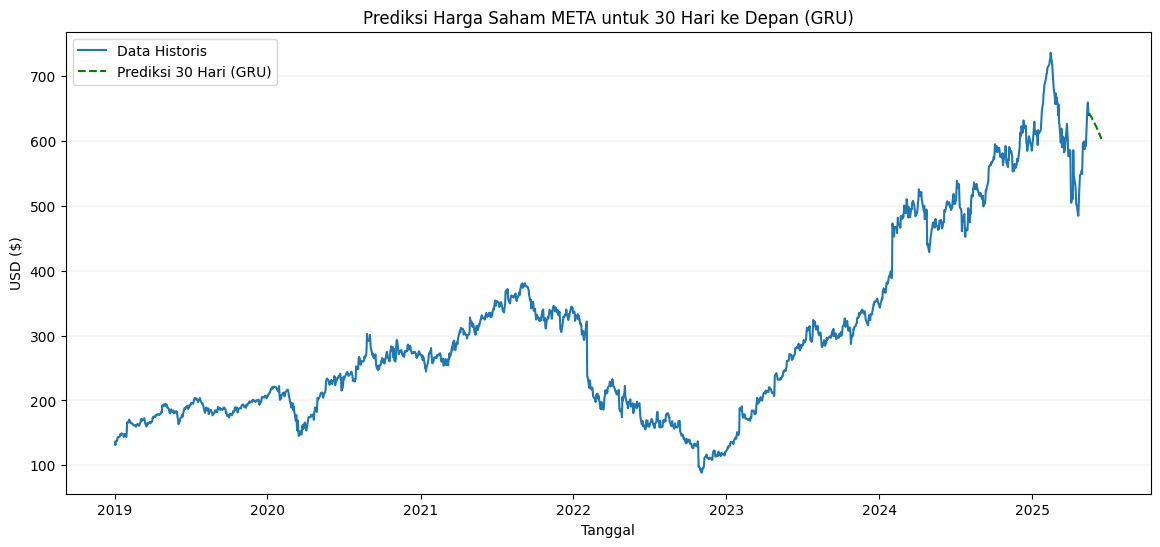

In [451]:
# Hitung tanggal masa depan
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Buat DataFrame hasil prediksi GRU
pred_30_gru_df = pd.DataFrame({
    'Date': future_dates,
    'Prediction_GRU': future_preds_inv_gru.flatten()
})

# Visualisasi hasil prediksi 30 hari ke depan dengan GRU
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham META untuk 30 Hari ke Depan (GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_gru_df['Date'], pred_30_gru_df['Prediction_GRU'], label='Prediksi 30 Hari (GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# STACKED GRU

In [452]:
# Define the stacked GRU model with unique variable name
model_stacked_gru = Sequential([
    Input(shape=(x_train.shape[1], 1)),
    GRU(100, return_sequences=True),
    Dropout(0.2),
    GRU(100, return_sequences=True),  # Added second GRU layer for stacking
    Dropout(0.2),
    GRU(100, return_sequences=False),  # Final GRU layer
    Dropout(0.2),
    Dense(1)
])

In [453]:
# Path for stacked GRU model checkpoint
checkpoint_path_stacked_gru = 'model_checkpoints/weights_stacked_gru_model.weights.h5'
checkpoint_stacked_gru = ModelCheckpoint(
    filepath=checkpoint_path_stacked_gru,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

In [454]:
# Early Stopping with unique variable name
early_stopping_stacked = EarlyStopping(
    monitor="val_loss",
    patience=5,
    min_delta=0.0001,
    verbose=1,
    restore_best_weights=True
)

In [455]:
# Compile model
model_stacked_gru.compile(optimizer='adam', loss='mean_squared_error')

In [456]:
# Training model
history_stacked_gru = model_stacked_gru.fit(
    x_train, y_train,
    batch_size=8,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_stacked_gru, early_stopping_stacked]
)

Epoch 1/100
152/157 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059
Epoch 1: val_loss improved from inf to 0.00077, saving model to model_checkpoints/weights_stacked_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0057 - val_loss: 7.7351e-04
Epoch 2/100
153/157 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1539e-04
Epoch 2: val_loss did not improve from 0.00077
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 8.1450e-04 - val_loss: 0.0015
Epoch 3/100
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.3060e-04
Epoch 3: val_loss improved from 0.00077 to 0.00058, saving model to model_checkpoints/weights_stacked_gru_model.weights.h5
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 5.3049e-04 - val_loss: 5.8329e-04
Epoch 4/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.5895e-04
Epoch 4: val_loss did not improve from 0.00058
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.5863e-04 - val_loss: 0.0016
Epoch 5/100
154/157 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - 

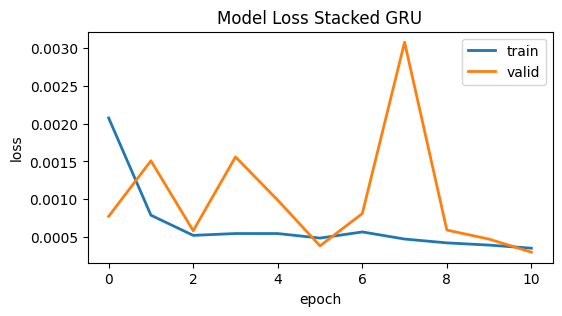

In [457]:
# Plot loss
plt.figure(figsize=(6,3))
plt.plot(history_stacked_gru.history['loss'], linewidth=2)
plt.plot(history_stacked_gru.history['val_loss'], linewidth=2)
plt.title('Model Loss Stacked GRU')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [458]:
# Load best model weights
model_stacked_gru.load_weights("model_checkpoints/weights_stacked_gru_model.weights.h5")

In [459]:
# Make predictions
y_pred_stacked_gru = model_stacked_gru.predict(x_test)
y_pred_stacked_gru = np.ceil(sc.inverse_transform(y_pred_stacked_gru))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  


In [460]:
# Evaluate Stacked GRU
mse_stacked_gru = round(mean_squared_error(y_test, y_pred_stacked_gru), 2)
rmse_stacked_gru = round(np.sqrt(np.mean(y_test - y_pred_stacked_gru)**2), 2)
mae_stacked_gru = round(mean_absolute_error(y_test, y_pred_stacked_gru), 2)
mape_stacked_gru = round(mean_absolute_percentage_error(y_test, y_pred_stacked_gru)*100, 2)

print("\n📊 Evaluasi Stacked GRU Model:")
print(f'MSE  : {mse_stacked_gru}')
print(f'RMSE : {rmse_stacked_gru}')
print(f'MAE  : {mae_stacked_gru}')
print(f'MAPE : {mape_stacked_gru} %')


📊 Evaluasi Stacked GRU Model:
MSE  : 264.44
RMSE : 1.1
MAE  : 11.74
MAPE : 1.98 %


In [461]:
# Create DataFrame for predictions
data_pred_stacked_gru = data[-test_len:].copy()
data_pred_stacked_gru['Prediction_Stacked_GRU'] = y_pred_stacked_gru

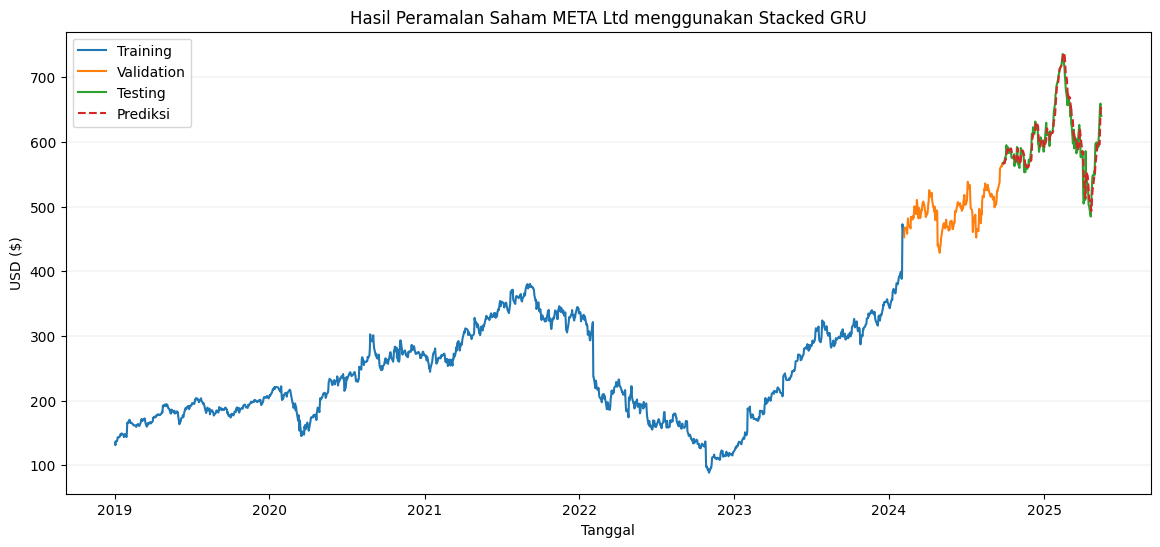

In [463]:
# Visualize predictions
train = data[:train_len]
valid = data[train_len:(train_len + val_len)]

plt.figure(figsize=(14,6))
plt.title('Hasil Peramalan Saham META Ltd menggunakan Stacked GRU')
plt.plot(train['Date'], train['Close'], label='Training')
plt.plot(valid['Date'], valid['Close'], label='Validation')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Close'], label='Testing')
plt.plot(data_pred_stacked_gru['Date'], data_pred_stacked_gru['Prediction_Stacked_GRU'], label='Prediksi', linestyle='--')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

In [464]:
# Predict next 30 days
last_30_stacked_gru = data_sc[-30:]
input_pred_stacked_gru = last_30_stacked_gru.reshape(1, 30, 1)

future_preds_stacked_gru = []

for _ in range(30):
    next_pred_stacked_gru = model_stacked_gru.predict(input_pred_stacked_gru, verbose=0)[0][0]
    future_preds_stacked_gru.append(next_pred_stacked_gru)
    next_input_stacked_gru = np.append(input_pred_stacked_gru[0, 1:, 0], next_pred_stacked_gru)
    input_pred_stacked_gru = next_input_stacked_gru.reshape(1, 30, 1)

In [465]:
# Inverse transform predictions
future_preds_inv_stacked_gru = sc.inverse_transform(np.array(future_preds_stacked_gru).reshape(-1, 1))
future_preds_inv_stacked_gru = np.ceil(future_preds_inv_stacked_gru)

In [466]:
# Create DataFrame for future predictions
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

pred_30_stacked_gru_df = pd.DataFrame({
    'Date': future_dates,
    'Prediction_Stacked_GRU': future_preds_inv_stacked_gru.flatten()
})

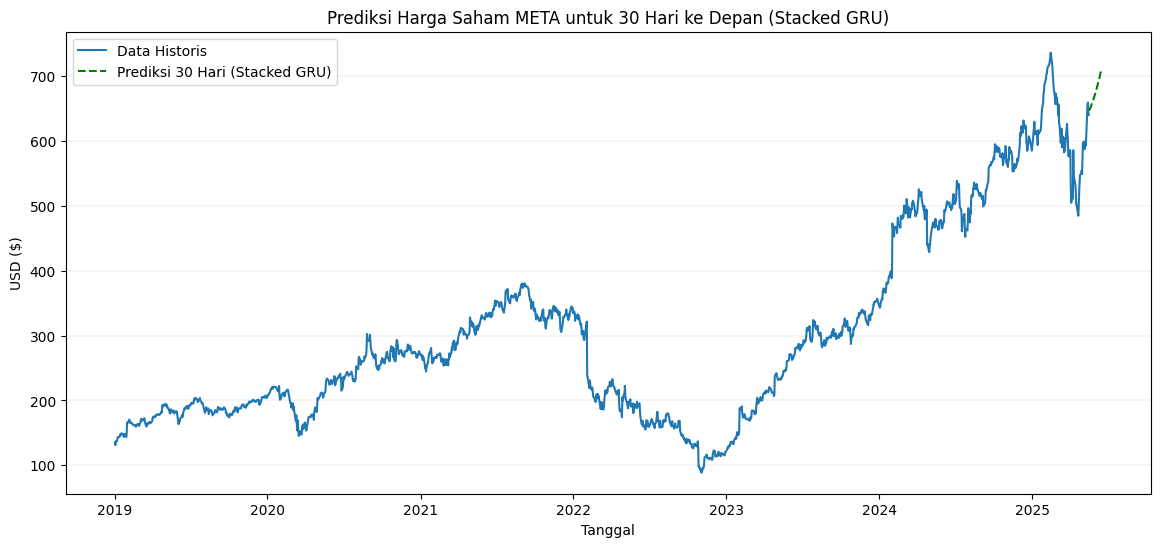

In [467]:
# Visualize 30-day future predictions
plt.figure(figsize=(14,6))
plt.title('Prediksi Harga Saham META untuk 30 Hari ke Depan (Stacked GRU)')
plt.plot(data['Date'], data['Close'], label='Data Historis')
plt.plot(pred_30_stacked_gru_df['Date'], pred_30_stacked_gru_df['Prediction_Stacked_GRU'], label='Prediksi 30 Hari (Stacked GRU)', linestyle='--', color='green')
plt.xlabel('Tanggal')
plt.ylabel('USD ($)')
plt.legend()
plt.grid(True, linewidth=0.18, axis='y')
plt.show()

# Perbandingan BI-GRU, GRU, STACKED GRU

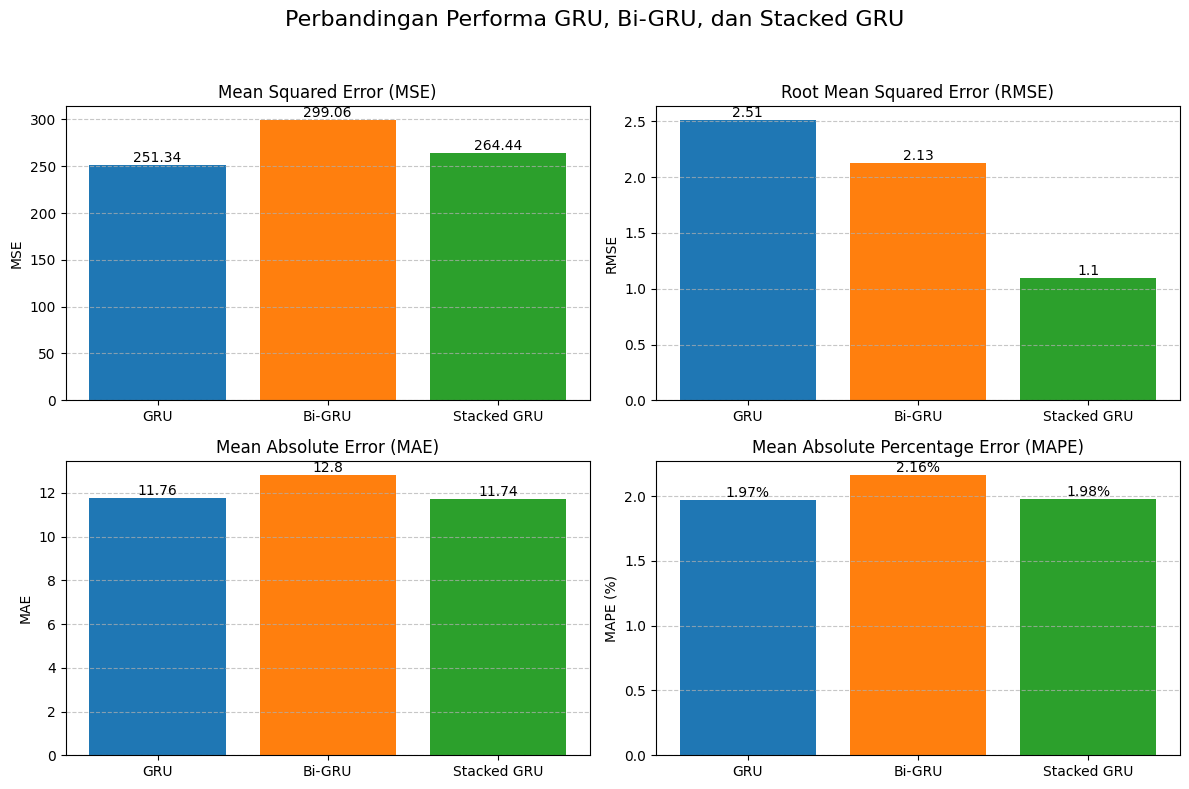

In [469]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
algorithms = ['GRU', 'Bi-GRU', 'Stacked GRU']
mse_values = [mse_gru, mse_bigru, mse_stacked_gru]
rmse_values = [rmse_gru, rmse_bigru, rmse_stacked_gru]
mae_values = [mae_gru, mae_bigru, mae_stacked_gru]
mape_values = [mape_gru, mape_bigru, mape_stacked_gru]

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Perbandingan Performa GRU, Bi-GRU, dan Stacked GRU', fontsize=16)

# Bar plot for MSE
axs[0, 0].bar(algorithms, mse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mse_values):
    axs[0, 0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for RMSE
axs[0, 1].bar(algorithms, rmse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[0, 1].set_title('Root Mean Squared Error (RMSE)')
axs[0, 1].set_ylabel('RMSE')
axs[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(rmse_values):
    axs[0, 1].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for MAE
axs[1, 0].bar(algorithms, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[1, 0].set_title('Mean Absolute Error (MAE)')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mae_values):
    axs[1, 0].text(i, v, str(v), ha='center', va='bottom')

# Bar plot for MAPE
axs[1, 1].bar(algorithms, mape_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axs[1, 1].set_title('Mean Absolute Percentage Error (MAPE)')
axs[1, 1].set_ylabel('MAPE (%)')
axs[1, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(mape_values):
    axs[1, 1].text(i, v, f'{v}%', ha='center', va='bottom')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

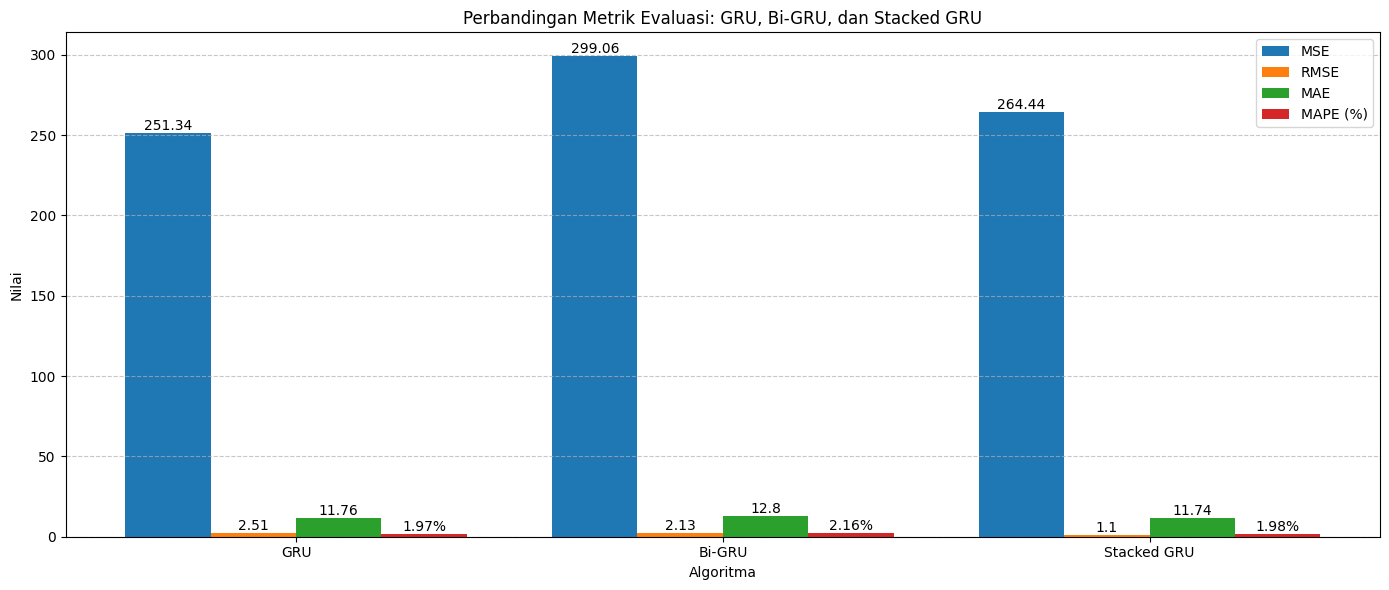

In [470]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
algorithms = ['GRU', 'Bi-GRU', 'Stacked GRU']
mse_values = [mse_gru, mse_bigru, mse_stacked_gru]
rmse_values = [rmse_gru, rmse_bigru, rmse_stacked_gru]
mae_values = [mae_gru, mae_bigru, mae_stacked_gru]
mape_values = [mape_gru, mape_bigru, mape_stacked_gru]

# Combined bar plot for all metrics
fig = plt.figure(figsize=(14, 6))
x = np.arange(len(algorithms))
width = 0.2

plt.bar(x - 1.5*width, mse_values, width, label='MSE', color='#1f77b4')
plt.bar(x - 0.5*width, rmse_values, width, label='RMSE', color='#ff7f0e')
plt.bar(x + 0.5*width, mae_values, width, label='MAE', color='#2ca02c')
plt.bar(x + 1.5*width, mape_values, width, label='MAPE (%)', color='#d62728')

plt.xlabel('Algoritma')
plt.ylabel('Nilai')
plt.title('Perbandingan Metrik Evaluasi: GRU, Bi-GRU, dan Stacked GRU')
plt.xticks(x, algorithms)
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, v in enumerate(mse_values):
    plt.text(i - 1.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(rmse_values):
    plt.text(i - 0.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(mae_values):
    plt.text(i + 0.5*width, v, str(v), ha='center', va='bottom')
for i, v in enumerate(mape_values):
    plt.text(i + 1.5*width, v, f'{v}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Berdasarkan hasil evaluasi menggunakan empat metrik yaitu MSE, RMSE, MAE, dan MAPE, algoritma Stacked GRU menunjukkan performa terbaik dibandingkan GRU dan Bi-GRU. Pada metrik RMSE, Stacked GRU memiliki nilai terendah yaitu 1.10, yang menunjukkan bahwa prediksi yang dihasilkan paling mendekati nilai aktual secara umum. Selain itu, pada metrik MAE, Stacked GRU juga unggul dengan nilai terendah sebesar 11.74, mengindikasikan error absolut rata-rata yang paling kecil. Sementara itu, pada metrik MSE, algoritma GRU memiliki performa terbaik dengan nilai 251.34, lebih rendah dibandingkan Stacked GRU (264.44) dan Bi-GRU (299.06). Begitu pula pada metrik MAPE, GRU mencatat nilai terendah yaitu 1.97%, meskipun selisihnya sangat kecil dibandingkan Stacked GRU (1.98%). Secara keseluruhan, meskipun GRU unggul dalam dua metrik, dominasi Stacked GRU pada metrik utama seperti RMSE dan MAE menjadikannya algoritma yang paling optimal dalam menghasilkan prediksi yang akurat. Sebaliknya, Bi-GRU menunjukkan performa terburuk di semua metrik yang diuji, sehingga kurang direkomendasikan untuk digunakan dalam konteks ini.